Plano de hoje
-------------

1. Ambiente de programação
2. Usando o computador para calcular
3. Usando o computador para desenhar
    1. **Traçando secantes e tangentes (derivadas)**
    1. **Animações e aproximações: algoritmo de secantes para achar zeros _vs_ Newton**

# Derivadas aproximadas

Nem sempre é possível calcular a derivada de uma função.
Às vezes, a função em questão não é dada de forma explícita.
Por exemplo, para
$$f(x) = \min_{|y| < x} \Big( \frac{\cos(2x^2 - 3y)}{20x - y}  \Big).$$

Assim, teremos que _estimar_ a derivada de $f$, sem calculá-la explicitamente.

A idéia principal é que
$$ f'(x) = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}, $$
ou seja, que a derivada é o limite do "quociente fundamental".
Podemos usar o computador para estimar este limite:

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def df(f, x, eps=1e-5):
    return (f(x+eps) - f(x))/eps

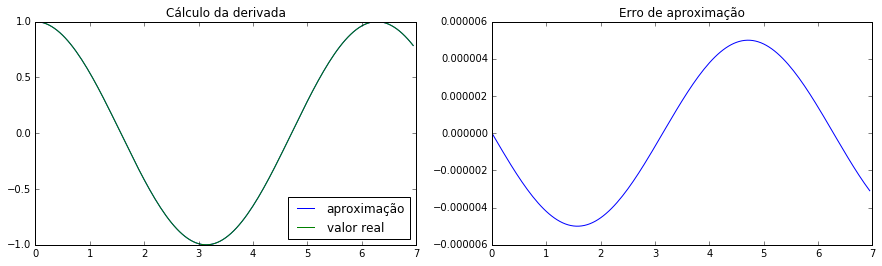

In [3]:
x = arange(0., 7., 0.05)
dfx = cos(x)
dfx_approx = df(sin,x)

figure(figsize=(15,4))
subplot(1,2,1)
title('Cálculo da derivada')
plot(x, dfx_approx, label='aproximação')
plot(x, dfx, label='valor real')
legend(loc=0)

subplot(1,2,2)
title('Erro de aproximação')
plot(x, dfx_approx - dfx);

### Exercício

Muitas vezes, a função que vamos usar é "vetorial", como por exemplo `sin`, `exp`.
Mas às vezes não é tão simples escrever uma forma vetorial para uma função.
Nestes casos, não podemos usar tão diretamente as funções acima para fazer gráficos,
e em vez disso devemos construir as listas (ou, melhor, `array`s) nós mesmos.

Vejamos um exemplo:

Seja $y = f(t)$ a raiz de $t\cos(x) = x$.
Uma forma de calcular $f$ seria, por exemplo,
usando o método da bisseção.
Por exemplo:

In [4]:
def bissecao(f,a,b,tol=1e-8):
    m = (a+b)/2
    eabs = abs(m-a)
    if eabs < tol: return m
    
    if f(m) == 0: return m
    if f(m)*f(a) < 0:
        return bissecao(f,a,m,tol)
    return bissecao(f,m,b,tol)

In [5]:
def f(t):
    def g(x):
        return t*cos(x) - x
    return bissecao(g,-pi/2,pi/2)

Agora, escreva uma função `fvect` que recebe um array do numpy e retorna o array correspondente a todas as $f(t)$
para cada $t$ no array.

In [24]:
def fvect(v):
    return array([f(t) for t in v])

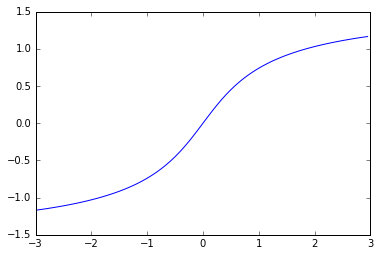

In [25]:
v = arange(-3,3,0.05)
plot(v, fvect(v));

Com a ajuda da fvect, faça um gráfico da derivada de $f$.

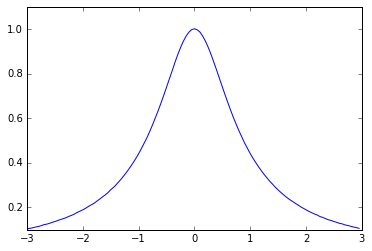

In [8]:
plot(v, df(fvect, v));

## Estimando o erro

Uma atividade importante ao se construir um método aproximativo é calcular (ou estimar) o erro cometido.
Em geral, estimativas de erros são feitas com mais do que as hipóteses mínimas para o método.
Por exemplo, no caso do método de Newton, basta a função ser derivável, mas para mostrar convergência quadrática,
temos que supor que ela terá duas derivadas, e que esta seja limitada no intervalo de convergência.

Vamos, então, seguir este padrão: queremos calcular a primeira derivada,
e para estimar o erro suporemos que a função é duas vezes derivável.
Assim:
$$ \frac{f(x+h) - f(x)}{h} - f'(x) = \frac{\big(f(x) + h f'(x) + \frac{h^2}{2} f''(x) + o(h^2) \big) - f(x)}{h} - f'(x)
   = \frac{h f''(x)}{2} + o(h).$$

No caso anterior onde $f(x) = \sin(x)$, temos portanto que o erro será aproximadamente $h (-\sin(x))/2$.
Vejamos o quão próximo isto é de fato:

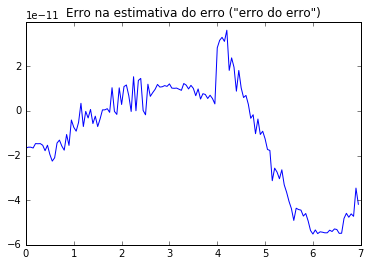

In [9]:
title('Erro na estimativa do erro ("erro do erro")')
plot(x, (dfx_approx - dfx) - (- 1e-5 * sin(x) / 2));

## Diferenças centrais

O exemplo anterior mostra que, se desejamos aproximar a derivada de uma função "bem-comportada" pelo quociente fundamental,
o erro será proporcional ao **passo** e à derivada segunda.
Assim, para diminuir o erro, teremos que diminuir igualmente o passo.
Mas isso pode resultar em erros de truncamento...

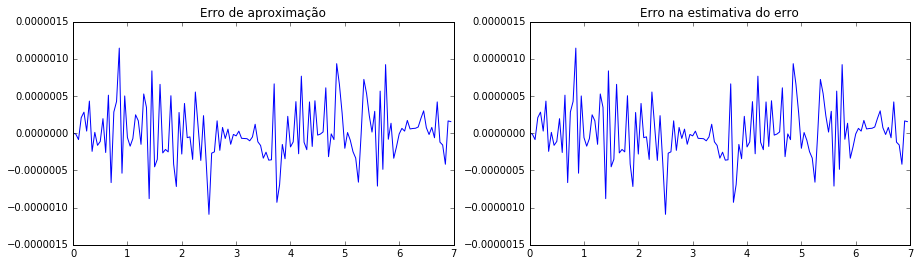

In [10]:
dfx_approx_2 = df(sin,x, eps=1e-10)

figure(figsize=(15,4))
subplot(1,2,1)
title('Erro de aproximação')
plot(x, dfx_approx_2 - dfx);

subplot(1,2,2)
title('Erro na estimativa do erro')
plot(x, (dfx_approx_2 - dfx) - (- 1e-10 * sin(x)/2));

Note que o erro de aproximação não parece ser proporcional a $\varepsilon$.
Para resolver isso, precisamos de um método de cálculo cujo erro seja menor!

Se uma função é 2 vezes derivável, temos que
$$ f(x+h) = f(x) + h f'(x) + \frac{h^2}{2} f''(x) + o(h^2) $$
onde $o(h^2)$ é um termo **muito pequeno** quando comparado com $h^2$.

Um outro quociente fundamental é
$$ f'(x) = \lim _ {h \to 0} \frac{f(x+h) - f(x-h)}{2h}. $$
Ao usar as fórmulas de Taylor acima até a ordem 2 para calcular as aproximações,
vemos que os termos de ordem *par* se anulam:
$$ \frac{f(x+h) - f(x-h)}{2h}
   = \frac{\big(f(x) + h f'(x) + \frac{h^2}{2} f''(x) + o(h^2)\big)
   - \big( f(x) - h f'(x) + \frac{h^2}{2} f''(x) + o(h^2) \big)}{2h} = o(h). $$
Assim, este método é bem melhor do que o anterior quando a função é duas vezes derivável.

Mais ainda: se ela fosse três vezes derivável, poderíamos trocar $o(h^2)$ por $h^3 f'''(x) + o(h^3)$,
e assim obteríamos um erro da ordem de $ \frac{h^2}{6} f''' $.
Vejamos o que acontece para o seno:

In [11]:
def df_sym(f,x,eps=1e-5):
    return (f(x+eps) - f(x-eps))/(2*eps)

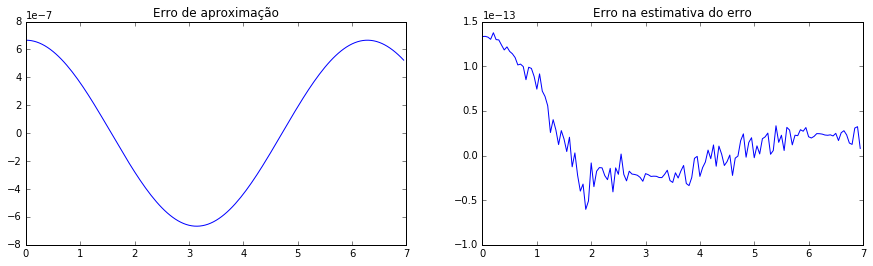

In [12]:
h = 0.2e-2
dfx_approx_3 = df_sym(sin,x,eps=h)

figure(figsize=(15,4))
subplot(1,2,1)
title('Erro de aproximação')
plot(x, dfx - dfx_approx_3);

subplot(1,2,2)
title('Erro na estimativa do erro')
plot(x, (dfx_approx_3 - dfx) - (-(h ** 2) * cos(x)/6));

### Exercício

Veja se o gráfico da derivada da função $f$ fica diferente quando é usada a aproximação centrada.

Agora, calcule analiticamente a derivada $f'(t)$, em função de $t$ e $x = f(t)$.
Use a fórmula da derivada de função implícita.

Como é o _erro_ de aproximação?
Lembre-se, para fazer um gráfico desta quantidade você vai ter que "vetorizar na mão" a `f_linha`!

In [13]:
def f_linha(t):
    x = f(t)
    pass

## Uma novidade: funções que retornam funções

Pode parecer estranho a primeira vista, pois estamos acostumados a que uma função retorne um "valor",
algo como um número, uma _string_, uma lista, ...
Mas em Python podemos retornar uma função, isso também é um "valor" aceitável de retorno.
O caso básico de utilização desta idéia é construir uma função _diferente_ para situações diferentes.

Vejamos como isso se aplica na secante: a secante é dada por dois pontos
$(x, f(x))$ e $(y, f(y))$.
Mas, para desenhar a secante junto com o gráfico da função,
precisamos da **função afim** correspondente.
Assim, dadas a função $f$ e as duas abscissas $x$ e $y$,
construimos a função afim e retornamos a mesma.

In [14]:
def sec(f,x,y):
    base = f(x)
    incl = (f(y) - f(x))/(y - x)
    def linha(z):
        return (z - x)*incl + base
    return linha

In [15]:
secantes = []
for alvo in [2, 1, 0.5, 0.1]:
    secantes.append( (alvo, sec(sin,0,alvo)) )

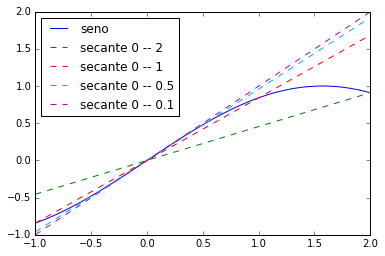

In [16]:
x = arange(-1, 2, 0.01)
plot(x, sin(x), label='seno')
for (alvo,s) in secantes:
    plot(x, s(x), '--', label='secante 0 -- {}'.format(alvo))
legend(loc=0);

# O método de Newton com aproximação da secante

Podemos modifiar o método de Newton para que ele calcule não a derivada (que podemos não saber calcular de forma simples!)
mas uma aproximação da mesma.
Temos assim um método dependendo de dois valores:
$$z = x - \frac{f(x)}{\frac{f(y) - f(x)}{y - x}} = x - \frac{f(x)\big( y - x \big)}{f(y) - f(x)} = \frac{x f(y) - y f(x)}{f(y) - f(x)}$$
onde $y$ é um outro ponto.
No caso de um método iterativo, podemos usar outros pontos de $f$ já calculados!

In [17]:
def newton_sec(f,x,y, tol=1e-10, maxiter=100):
    prox = (x*f(y) - y*f(x))/(f(y) - f(x))
    if abs(prox - y) < tol: # Erro pequeno: convergiu
        return prox
    if maxiter == 0: # Não convergiu
        return prox
    
    return newton_sec(f,y,z,tol, maxiter-1)

## Performance

O "método da secante", como é conhecido, converge mais lentamente do que o método de Newton:
podemos mostrar que os erros $e_i$ satisfazem uma "recorrência de desigualdade":
$$ e_{n+1} < C (e_n \cdot e_{n-1}). $$
Mas, como este calcula menos vezes a função, ele converge mais rápido por número de chamadas a $f$.

### Exercício: Fazer uma comparação entre as velocidades de Newton e da Secante.

Comece fazendo um gráfico simples, com a precisão da resposta em função do número de passos.
Em seguida, faça o gráfico da precisão em função do número de vezes que a função $f$ é calculada.

Se tiver tempo, faça desenhos indicando os pontos das iterações.
Enfim, se você tiver mais tempo ainda, anime o desenho "ao longo do tempo":
faça aparecer os pontos de Newton e da secante "na ordem em que foram obtidos"
(em função do número de vezes que $f$ foi calculada).